# 텐서플로우를 이용한 이미지 분류
#### TensorFlow를 활용한 이미지 분류 모델 구현
    - 2024-1 다이브 교육부장 정현민

In [1]:
!pip install --upgrade git+https://github.com/dAiv-CNU/tensordaiv.git

  Cloning https://github.com/dAiv-CNU/tensordaiv.git to /tmp/pip-req-build-aey7cqau
  Running command git clone --filter=blob:none --quiet https://github.com/dAiv-CNU/tensordaiv.git /tmp/pip-req-build-aey7cqau
  Resolved https://github.com/dAiv-CNU/tensordaiv.git to commit a22e1fafaa491748c3337b81b14921bdd6061517
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 63.8 MB/s

## 목차
    - 이미지 분류란?
    - 텐서플로우 소개
    - 모델 구현 실습

## 이미지 분류란?
<img src="https://github.com/dAiv-CNU/tensordaiv/blob/main/res/2024-1%20dAiv%20%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98%20%ED%8A%B9%EA%B0%95/1_image_classification_example.png?raw=true">

## 텐서플로우 소개
    - 구글에서 만든 오픈소스 머신러닝 라이브러리
    - 딥러닝 모델 개발 및 배포에 사용
    - 특징
        - 높은 유연성 및 확장성
        - 다양한 언어를 지원 (Python, JavaScript, C++, 등)
        - 풍부한 커뮤니티와 자료

## 모델 구현 실습

### 데이터 준비
    - 데이터 수집
        - 공개 데이터셋 사용 (ex: CIFAR-10, MNIST)
        - 직접 수집

    - 데이터 전처리
        - 이미지 크기 조정
        - 정규화
        - 데이터 증강 (Data Augmentation)

<div>
    <img src="https://github.com/dAiv-CNU/tensordaiv/blob/main/res/2024-1%20dAiv%20%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98%20%ED%8A%B9%EA%B0%95/2_data_augmentation_1.png?raw=true" width="1000">
</div>
<div>
    <img src="https://github.com/dAiv-CNU/tensordaiv/blob/main/res/2024-1%20dAiv%20%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98%20%ED%8A%B9%EA%B0%95/3_data_augmentation_2.png?raw=true" width="1000">
</div>

In [2]:
import tensorflow as tf
from tensordaiv import nn
from keras import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from rich.traceback import install
install(show_locals=True)

<bound method InteractiveShell.excepthook of <google.colab._shell.Shell object at 0x7c7c919ac1c0>>

In [3]:
cls2lab = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# 데이터 전처리
train_images, test_images = train_images / 255.0, test_images / 255.0

# 검증용 데이터 셋 분리 (80% 학습용, 20% 검증용)
train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

print(train_images.shape, valid_images.shape)

# 원핫 인코딩 적용
train_labels = tf.one_hot(train_labels, 10)
valid_labels = tf.one_hot(valid_labels, 10)
test_labels = tf.one_hot(test_labels, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(48000, 28, 28) (12000, 28, 28)


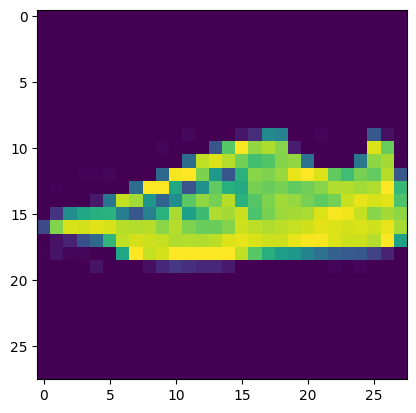

In [4]:
# 데이터 셋 확인
plt.imshow(train_images[0])

### 모델 구축 (개념 소개)
    - CNN이란? - Convolutional Neural NetWork
         이미지의 데이터로부터 feature map을 자동으로 추출해 이미지의 특징을 학습하는 모델

    *feature map 이란?
         모델이 학습하기 위해 만든 이미지의 특징(feature)을 담은 map

<div>
    <img src="https://github.com/dAiv-CNU/tensordaiv/blob/main/res/2024-1%20dAiv%20%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98%20%ED%8A%B9%EA%B0%95/4_cnn_explanation.gif?raw=true" width="1000">
</div>
<div>
    <img src="https://github.com/dAiv-CNU/tensordaiv/blob/main/res/2024-1%20dAiv%20%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98%20%ED%8A%B9%EA%B0%95/5_max_pooling_explanation.png?raw=true" width="1000">
</div>
<div>
    <img src="https://github.com/dAiv-CNU/tensordaiv/blob/main/res/2024-1%20dAiv%20%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98%20%ED%8A%B9%EA%B0%95/6_max_pooling_explanation.png?raw=true" width="1000">
</div>

#### TensorFlow-Keras의 신경망 구조 구현 방식 [(참고자료)](https://velog.io/@lighthouse97/Tensorflow%EB%A1%9C-%EB%AA%A8%EB%8D%B8%EC%9D%84-%EB%A7%8C%EB%93%9C%EB%8A%94-3%EA%B0%80%EC%A7%80-%EB%B0%A9%EB%B2%95)
    - 방법 1: Functional API
    - 방법 2: Sequential API
    - 방법 3: Subclassing API

In [5]:
# 방법 1: Functional API 사용해서 모델 정의하기
def create_model(activation = tf.nn.relu, padding = "SAME"):
    # 28*28 크기의 1채널 이미지를 input 크기 값으로 지정
    inputs = nn.Input(shape=(28, 28, 1))

    # 첫 번째 conv2D 블록
    hidden1 = nn.layers.Conv2D(8, 3, 1, activation=activation, padding=padding)(inputs)
    hidden1 = nn.layers.Conv2D(8, 3, 1, activation=activation, padding=padding)(hidden1)
    hidden1 = nn.layers.Conv2D(8, 3, 1, activation=activation, padding=padding)(hidden1)
    hidden1 = nn.layers.MaxPooling2D()(hidden1)

    # 여러 층을 쌓는 이유: 네트워크가 더 깊은 특징을 학습할 수 있도록

    # 두 번째 conv2D 블록
    hidden2 = nn.layers.Conv2D(16, 3, 1, activation=activation, padding=padding)(hidden1)
    hidden2 = nn.layers.Conv2D(16, 3, 1, activation=activation, padding=padding)(hidden2)
    hidden2 = nn.layers.Conv2D(16, 3, 1, activation=activation, padding=padding)(hidden2)
    hidden2 = nn.layers.MaxPooling2D()(hidden2)

    # 세 번째 conv2D 블록
    hidden3 = nn.layers.Conv2D(32, 3, 1, activation=activation, padding=padding)(hidden2)
    hidden3 = nn.layers.Conv2D(32, 3, 1, activation=activation, padding=padding)(hidden3)
    hidden3 = nn.layers.Conv2D(32, 3, 1, activation=activation, padding=padding)(hidden3)

    # 마지막 출력 값의 feature를 1차원 벡터로 만들기 위해 GlobalAveragePooling2D 사용
    flatten = nn.layers.GlobalAveragePooling2D()(hidden3)

    # Dense 레이어로 클래스 분류
    # 10개의 클래스와 소프트맥스 활성화 함수를 가진 완전 연결 레이어 (Fully Connected Layer)
    outputs = nn.layers.Dense(10, activation=tf.nn.softmax)(flatten)

    return nn.models.Model(inputs=inputs, outputs=outputs)

create_model().summary()  # 모델 생성 후 구조 요약 출력

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,522 (119.23 KB)

 Trainable params: 30,522 (119.23 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 방법 2: Sequential API 사용해서 모델 정의하기
class MyModel(nn.Sequential):
    def __init__(self, activation=tf.nn.relu, padding="SAME"):
        super().__init__([
            nn.layers.Conv2D(8, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(8, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(8, 3, 1, activation=activation, padding=padding),
            nn.layers.MaxPooling2D(),

            nn.layers.Conv2D(16, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(16, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(16, 3, 1, activation=activation, padding=padding),
            nn.layers.MaxPooling2D(),

            nn.layers.Conv2D(32, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(32, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(32, 3, 1, activation=activation, padding=padding),

            nn.layers.GlobalAveragePooling2D(),
            nn.layers.Dense(10, activation=tf.nn.softmax)
        ])

        self.build(input_shape=(None, 28, 28, 1))

model = MyModel()  # 모델 인스턴스 생성
model.summary()  # 모델 요약 출력

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 7, 7, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,522 (119.23 KB)

 Trainable params: 30,522 (119.23 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 방법 3: Subclassing API를 이용한 모델 정의
class MyCNN(nn.Model):
    def __init__(self, activation=tf.nn.relu, padding="SAME"):
        """
        CNN 분류 모델 정의
        :param activation: 활성화 함수 지정, 기본 값은 ReLU
        :param padding: "VALID"면 패딩 적용 X, "SAME"이면 패딩 적용하여 입력과 출력의 차원을 동일하게 유지
        """

        # 28*28 크기의 1채널 이미지를 input 크기 값으로 지정
        super().__init__(input_size=(28, 28, 1))

        # 첫 번째 conv2D 블록
        self.hidden1 = nn.Sequential([
            nn.layers.Conv2D(8, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(8, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(8, 3, 1, activation=activation, padding=padding)
        ], name="conv2d_hidden1")

        self.polling1 = nn.layers.MaxPooling2D()

        # 여러 층을 쌓는 이유: 네트워크가 더 깊은 특징을 학습할 수 있도록

        # 두 번째 conv2D 블록
        self.hidden2 = nn.Sequential([
            nn.layers.Conv2D(16, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(16, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(16, 3, 1, activation=activation, padding=padding)
        ], name="conv2d_hidden2")

        self.polling2 = nn.layers.MaxPooling2D()

        # 세 번째 conv2D 블록
        self.hidden3 = nn.Sequential([
            nn.layers.Conv2D(32, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(32, 3, 1, activation=activation, padding=padding),
            nn.layers.Conv2D(32, 3, 1, activation=activation, padding=padding)
        ], name="conv2d_hidden3")

        # 마지막 출력 값의 feature를 1차원 벡터로 만들기 위해 GlobalAveragePooling2D 사용
        self.flatten = nn.layers.GlobalAveragePooling2D()

        # Dense 레이어로 클래스 분류
        # 10개의 클래스와 소프트맥스 활성화 함수를 가진 완전 연결 레이어 (Fully Connected Layer)
        self.dense = nn.layers.Dense(10, activation=tf.nn.softmax)

    def call(self, inputs):
        x1 = self.hidden1(inputs)
        x2 = self.hidden2(self.polling1(x1))
        x3 = self.hidden3(self.polling2(x2))
        out = self.flatten(x3)
        return self.dense(out)

### 모델 학습

In [8]:
# 모델 생성
model = MyCNN()
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_hidden1 (Sequential)          │ (None, 28, 28, 8)           │           1,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_hidden2 (Sequential)          │ (None, 14, 14, 16)          │           5,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_hidden3 (Sequential)          │ (None, 7, 7, 32)            │          23,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,522 (119.23 KB)

 Trainable params: 30,522 (119.23 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 모델 컴파일
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# 모델 학습
model.fit(train_images, train_labels, epochs=10, validation_data=(valid_images, valid_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5671 - loss: 1.1227 - val_accuracy: 0.7908 - val_loss: 0.5640
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8112 - loss: 0.5165 - val_accuracy: 0.8463 - val_loss: 0.4418
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8500 - loss: 0.4167 - val_accuracy: 0.8629 - val_loss: 0.3771
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8684 - loss: 0.3557 - val_accuracy: 0.8574 - val_loss: 0.3824
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8785 - loss: 0.3266 - val_accuracy: 0.8818 - val_loss: 0.3211
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8925 - loss: 0.2898 - val_accuracy: 0.8901 - val_loss: 0.3052
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9008 - loss: 0.2708 - val_accuracy: 0.8979 - val_loss: 0.2728
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9059 - loss: 0.2

### 모델 평가

In [11]:
# 모델 테스트
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9018 - loss: 0.2780
Test Accuracy: 90.31%
